# Scikit Learn

# Régression sur le prix des maisons à boston

## 1) Import de dataset

In [1]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

boston = datasets.load_boston()
X = boston["data"]
y = boston["target"]



## 2) separer le jeu d'apprentissage du jeu de test

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## 3) Standardiser les valeurs

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

## 4) choisir un algo et le tester
exemple : Support Vector Machine

In [6]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

from sklearn.model_selection import  cross_val_score
cross_val_score(svr, X, y, n_jobs=-1)

array([0.77285459, 0.72771739, 0.56131914, 0.15056451, 0.08212844])

## 5) aller au delà des paramètres par défaut avec un grid search

In [7]:
from sklearn.model_selection import GridSearchCV
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.5682585559159307 SVR(gamma=0.1)


## 5.1) affiner le grid search

In [8]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.6215403348380314 SVR(C=1.5, gamma=0.1)


In [9]:
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.7048020987910757 SVR(C=2.5, gamma=0.05)


In [10]:
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.7412556912264312 SVR(C=4, degree=1, gamma=0.07)


In [11]:
parameters = {  'C'       : [4, 5, 6, 7]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03, 0.05, 0.07],
                 "degree" : [1,2, 3]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.7781726495133967 SVR(C=7, degree=1, gamma=0.07)


In [12]:
parameters = {  'C'       : [10, 15, 20, 30]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [0.01, 0.05, 0.15],
                 "degree" : [1,2]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.8055240262132555 SVR(C=30, degree=1, epsilon=0.15, gamma=0.03)


In [13]:
parameters = {  'C'       : [190, 200, 250, 260]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [1.5, 2, 2.5],
                 "degree" : [1,2]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)


0.8408296659493926 SVR(C=190, degree=1, epsilon=2.5, gamma=0.03)


In [14]:
# Exercice => tester vos propres paramètres

# On aurait pu faire une fonction de test : 

In [15]:
def test_hyperparametres(hyperparametres):
    grid       = GridSearchCV(svm.SVR(), hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_
    

In [16]:
hyperparametres = {  'gamma' : [0.01, 0.1, 0.5, 0.015]          ,
                  "kernel" : ['linear', 'poly', 'rbf', 'sigmoid',  ],
                  "C" : [105, 200]}
test_hyperparametres(hyperparametres)

0.830943306196208 SVR(C=105, gamma=0.1)


(0.830943306196208, SVR(C=105, gamma=0.1))

In [17]:
from sklearn.linear_model import Lasso

In [18]:
def test_hyperparametres(algo, hyperparametres):
    grid       = grid_search.GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_


In [19]:
algo = Lasso()
params = {"max_iter" : [ 1000],
         "alpha" : [0.1], 
         "selection": ["random", "cyclic"]}
grid       = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)    


0.6768745262580209 Lasso(alpha=0.1, selection='random')


# Import de xgboost

In [20]:
!pip install xgboost

In [21]:
!brew install libomp

'brew' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


In [22]:
from xgboost import XGBRegressor
algo = XGBRegressor()

In [29]:
default_hyperparameters = algo.get_params()
espace_de_Recherche = {}
valeurs_de_recherches=[]
for i, hyperparam in enumerate(default_hyperparameters):
    default_value = default_hyperparameters[hyperparam]
    print(default_value)
    if default_value:
        
        if type(default_value) == int:
            delta = default_value * 2
            valeurs_de_recherches = [default_value-delta,default_value, default_value+ delta]
        if type(default_value) == float:
            delta = default_value * 0.1
            valeurs_de_recherches = [default_value-delta,default_value, default_value+ delta]
        if type(default_value) == bool:
            valeurs_de_recherches = [True, False]
        espace_de_Recherche[hyperparam]=valeurs_de_recherches
        print(hyperparam, default_value, valeurs_de_recherches)
espace_de_Recherche["n_jobs"]=[-1]

reg:squarederror
objective reg:squarederror []
None
None
None
None
None
None
None
gain
importance_type gain []
None
None
None
None
None
nan
missing nan [nan, nan, nan]
None
100
n_estimators 100 [-100, 100, 300]
None
None
None
None
None
None
None
None
None
None


In [24]:
default_hyperparameters

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [30]:
def test_hyperparametres(algo, hyperparametres):
    grid       = GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_


In [31]:
espace_de_Recherche = {
    "max_depth" : [1,5,10],
    "gamma" : [0.5, 1, 1.1, 1.2, 1.5]
}
test_hyperparametres(XGBRegressor(), espace_de_Recherche)

0.8357648617545967 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


(0.8357648617545967,
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))

In [32]:
modele = algo.fit(X_train, y_train)

modele.score(X_test, y_test)

0.8666173450442418

# 6) tester tous les algorithmes

In [33]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print( e)
        if verbose: print ("="*30)
    return algos

In [34]:
algos = get_sklearn_algorithms()
algos

defaultdict(list,
            {'feature_extraction': [sklearn.feature_extraction._dict_vectorizer.DictVectorizer,
              sklearn.feature_extraction._hash.FeatureHasher],
             'linear_model': [sklearn.linear_model._bayes.ARDRegression,
              sklearn.linear_model._bayes.BayesianRidge,
              sklearn.linear_model._coordinate_descent.ElasticNet,
              sklearn.linear_model._coordinate_descent.ElasticNetCV,
              sklearn.linear_model._glm.glm.GammaRegressor,
              sklearn.linear_model._huber.HuberRegressor,
              sklearn.linear_model._least_angle.Lars,
              sklearn.linear_model._least_angle.LarsCV,
              sklearn.linear_model._coordinate_descent.Lasso,
              sklearn.linear_model._coordinate_descent.LassoCV,
              sklearn.linear_model._least_angle.LassoLars,
              sklearn.linear_model._least_angle.LassoLarsCV,
              sklearn.linear_model._least_angle.LassoLarsIC,
              sklearn.

## Liste les algorithmes

In [35]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))


===> feature_extraction
DictVectorizer,FeatureHasher

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,GammaRegressor,HuberRegressor,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClassifier,PassiveAggressiveRegressor,Perceptron,PoissonRegressor,RANSACRegressor,Ridge,RidgeCV,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SGDRegressor,TheilSenRegressor,TweedieRegressor

===> model_selection
GridSearchCV,RandomizedSearchCV

===> preprocessing
Binarizer,FunctionTransformer,KBinsDiscretizer,KernelCenterer,LabelBinarizer,LabelEncoder,MaxAbsScaler,MinMaxScaler,MultiLabelBinarizer,Normalizer,OneHotEncoder,OrdinalEncoder,PolynomialFeatures,PowerTransformer,QuantileTransformer,RobustScaler,StandardScaler

===> svm
LinearSVC,LinearSVR,NuSVC,NuSVR,OneClassSVM,SVC

## supprimer les warnings dans jupyter

In [36]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Utiliser chaque algo et conserver les performances

In [37]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print ("="*30)
    

Transforms lists of featu
'numpy.ndarray' object has no attribute 'items'
Implements feature hashin
'FeatureHasher' object has no attribute 'score'
Bayesian ARD regression.
0.7663120325736036
Bayesian ridge regression
0.7640617241015707
Linear regression with co
0.6948559435752488
Elastic Net model with it
0.7670176019595637
Generalized Linear Model
0.729419636010737
Linear regression model t
0.7743723274877092
Least Angle Regression mo
0.757972185783555
Cross-validated Least Ang
0.7669745964057882
Linear Model trained with
0.7046122618423348
Lasso linear model with i
0.7656320013628716
Lasso model fit with Leas
-2.327633553123043e-05
Cross-validated Lasso, us
0.7653780350917231
Lasso model fit with Lars
0.7642987597192029
Ordinary least squar
0.7579721857835547
Logistic Regression
Algo de classification
Logistic Regression CV (a
Algo de classification
Multi-task ElasticNet mod
For mono-task outputs, use ElasticNet
Multi-task L1/L2 ElasticN
For mono-task outputs, use ElasticNetCV
Multi

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 11 are removed. Con

## meilleur algo

In [38]:
best_algorithm, best_perf

(PoissonRegressor(), 0.8366801340638446)

## Performances de chaque algo :

In [39]:
performances

{'Bayesian ARD regression.': [0.7663120325736036],
 'Bayesian ridge regression': [0.7640617241015707],
 'Linear regression with co': [0.6948559435752488],
 'Elastic Net model with it': [0.7670176019595637],
 'Generalized Linear Model': [0.6855599433042725],
 'Linear regression model t': [0.7743723274877092],
 'Least Angle Regression mo': [0.757972185783555],
 'Cross-validated Least Ang': [0.7669745964057882],
 'Linear Model trained with': [0.7046122618423348],
 'Lasso linear model with i': [0.7656320013628716],
 'Cross-validated Lasso, us': [0.7653780350917231],
 'Lasso model fit with Lars': [0.7642987597192029],
 'Ordinary least squar': [0.7579721857835547],
 'Orthogonal Matching Pursu': [0.557480566613636],
 'Cross-validated Orthogona': [0.723378893156337],
 'Passive Aggressive Regres': [0.6957536237566302],
 'RANSAC (RANdom SAmple Con': [0.6713736775258777],
 'Linear least squares with': [0.759392584824974],
 'Ridge regression with bui': [0.7593925848249856],
 'Linear model fitted b

## on manipule les performances via panda

In [40]:
import pandas as pd

In [41]:
df = pd.DataFrame(performances).T

In [42]:
col_name = "performance"
df.columns = [col_name]

In [43]:
df.performance.sort_values()
df

,performance
Bayesian ARD regression.,0.766312
Bayesian ridge regression,0.764062
Linear regression with co,0.694856
Elastic Net model with it,0.767018
Generalized Linear Model,0.685560
Linear regression model t,0.774372
Least Angle Regression mo,0.757972
Cross-validated Least Ang,0.766975
Linear Model trained with,0.704612
Lasso linear model with i,0.765632


## calcul des gains de performance d'un algo l'autre

In [44]:
liste_des_performances = df.performance.values
gains = [0]
for indice, performance in enumerate(liste_des_performances):
    if indice>0:
        previous_value = liste_des_performances[indice-1]
        current_value  = liste_des_performances[indice]
        gain = (current_value - previous_value) / previous_value
        gains.append(round(gain*100, 2))
df["gains"] = gains

In [45]:
#

In [46]:
df

,performance,gains
Bayesian ARD regression.,0.766312,0.00
Bayesian ridge regression,0.764062,-0.29
Linear regression with co,0.694856,-9.06
Elastic Net model with it,0.767018,10.39
Generalized Linear Model,0.685560,-10.62
Linear regression model t,0.774372,12.95
Least Angle Regression mo,0.757972,-2.12
Cross-validated Least Ang,0.766975,1.19
Linear Model trained with,0.704612,-8.13
Lasso linear model with i,0.765632,8.66


## Tracer les performances par algo

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [48]:
df = df.drop("gains", axis=1)

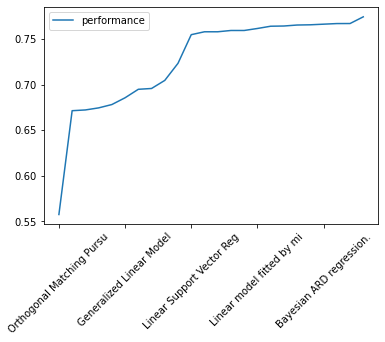

In [49]:
df = df.sort_values(col_name)
ax = df.plot(rot=45, x_compat=True)

### Augmentation du nombre de légend

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (24).

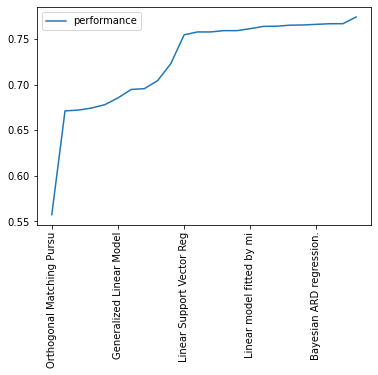

In [50]:
df = df.sort_values(col_name)
ax = df.plot(rot=90, x_compat=True)
ax.xaxis.set_ticklabels(df.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

### Rotation des infos sur x, et image plus large

In [ ]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(rot=45, ax=axes)


### affichage en barre

<ipython-input-51-28c9d528bd67>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.xaxis.set_ticklabels(df.index)


<AxesSubplot:>

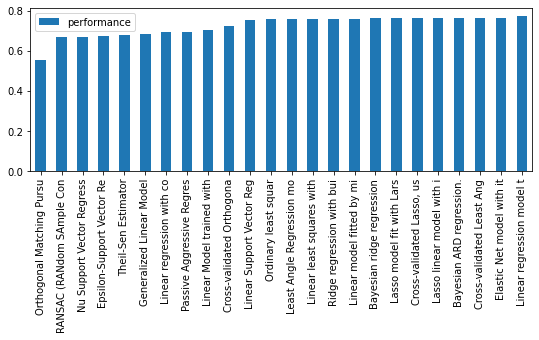

In [51]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(kind='bar', rot=90, ax=axes)

## on rajoute la perforamnce dans les labels

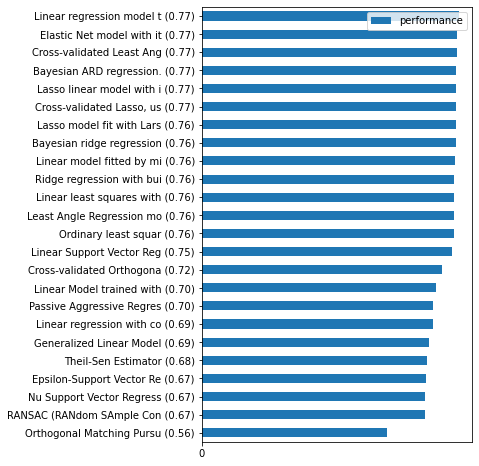

In [52]:
new_labels = []
for i, index in enumerate(df.index):
    new_label = "%s (%.2f)"%(index,df.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass

# 7) which scoring function ?

## on récupère les fonctions de score

In [53]:
def get_sklearn_score_functions(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions named as 'score'.
    
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ score_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if "score" in nom_fonction:
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print (e)
        if verbose: print ("="*30)
    return algos

In [54]:
scoring_modules = get_sklearn_score_functions(False)

In [55]:
scoring_modules.keys()

dict_keys(['metrics', 'model_selection'])

## on s'intéresse aux métriques

In [56]:
scoring_modules["metrics"]

[<module 'sklearn.metrics._scorer' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\sklearn\\metrics\\_scorer.py'>,
 <function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>,
 <function sklearn.metrics.cluster._supervised.adjusted_mutual_info_score(labels_true, labels_pred, *, average_method='arithmetic')>,
 <function sklearn.metrics.cluster._supervised.adjusted_rand_score(labels_true, labels_pred)>,
 <function sklearn.metrics._ranking.average_precision_score(y_true, y_score, *, average='macro', pos_label=1, sample_weight=None)>,
 <function sklearn.metrics._classification.balanced_accuracy_score(y_true, y_pred, *, sample_weight=None, adjusted=False)>,
 <function sklearn.metrics._classification.brier_score_loss(y_true, y_prob, *, sample_weight=None, pos_label=None)>,
 <function sklearn.metrics.cluster._unsupervised.calinski_harabasz_score(X, labels)>,
 <function sklearn.metrics._classification.cohen_kappa_score(y1, y2, *, labe

# 8) tester les métriques sur un algo

In [57]:
from sklearn.ensemble import BaggingRegressor

# 8.1) l'algo a des performances variables

In [58]:
performances = {}
for i in range(10):
    algorithme = BaggingRegressor()
    algorithme.fit(X_train, y_train)
    performance = algorithme.score(X_test, y_test)
    print (i, performance)
    performances[i] = [performance]

0 0.8545634870584456
1 0.844512817595508
2 0.8623409044310826
3 0.8434085407063867
4 0.8604498166055498
5 0.8572091392902808
6 0.8887996551979787
7 0.8089147668471224
8 0.8824110743990073
9 0.8208071537377102


<AxesSubplot:>

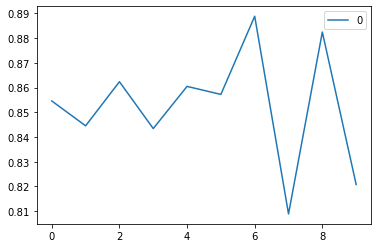

In [59]:
pd.DataFrame.from_dict(performances).T.plot()

## On peut calculer diverses métriques

In [60]:
y_pred = algorithme.predict(X_test)

In [61]:
score_par_metric = {}
for scoring_function in scoring_modules["metrics"]:
    try:
        info         = str(scoring_function)
        nom_metrique = info[info.find(" "):info.find(" at ")].strip()
        score_algo   = scoring_function(y_test, y_pred)
        score_par_metric[nom_metrique] =  [score_algo]
        print (nom_metrique, " => ", score_algo)
    except:
        pass

adjusted_mutual_info_score  =>  -0.0005104014144237845
adjusted_rand_score  =>  -0.00041525241909251526
completeness_score  =>  0.9080792493885602
explained_variance_score  =>  0.8245612741486406
fowlkes_mallows_score  =>  0.0
homogeneity_score  =>  0.9946442182254858
mutual_info_score  =>  4.624929635670679
normalized_mutual_info_score  =>  0.9493925843333124
r2_score  =>  0.8208071537377102
v_measure_score  =>  0.9493925843333123


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass greater_is_better=[17.02 44.7   9.62 15.95 23.06 20.27 20.88 20.44 32.75 15.61 21.05 26.63
  9.67 27.98 20.91 20.92 30.12 20.59 21.18 25.84  6.13 21.3  21.33 18.28
 25.   44.42 45.45 17.51 20.75 34.67  9.27 19.11 20.77 48.71 34.92 18.35
 33.02 17.21 15.4  15.56 15.69 19.13 21.63 24.34  9.25 19.24  9.72 15.55
  9.5  21.31 28.73 31.07 28.75 42.53 40.93 20.21 17.46 23.15 20.61 24.94
 20.55 19.97 22.81 19.1  23.63 25.39 20.02 19.86 23.79 34.71 25.96 19.83
 12.1  36.6  46.57 17.06 22.39 34.23 45.39 21.96 24.57 44.61 32.89 24.59
 47.85 21.9  21.19 34.41 18.49 20.98 19.76 26.87 12.85 12.32 16.04 14.56
 21.16 19.71 19.11 23.45 22.28 18.15 25.52 23.23 32.69 20.11 33.83 43.35
 23.19  7.93 20.91 49.23 20.96 21.14 12.8  10.46 23.01 20.55  8.86 11.02
 10.9  28.26 21.19  9.04 14.3  36.2   8.22 24.34  7.92 23.77 16.64 14.71
 21.37 15.28 19.29 20.21 24.13 14.19 41.95 24.25 19.56  7.21 19.36 47.36
 32.01 23.98

## on les manipule dans une dataframe pandas

In [62]:
df_metriques = pd.DataFrame.from_dict(score_par_metric).T

In [63]:
colonne_de_score = "score"
df_metriques.columns = [colonne_de_score]
df_metriques.sort_values(colonne_de_score)

,score
adjusted_mutual_info_score,-0.000510
adjusted_rand_score,-0.000415
fowlkes_mallows_score,0.000000
r2_score,0.820807
explained_variance_score,0.824561
completeness_score,0.908079
v_measure_score,0.949393
normalized_mutual_info_score,0.949393
homogeneity_score,0.994644
mutual_info_score,4.624930


## on peut les dessiner

<AxesSubplot:>

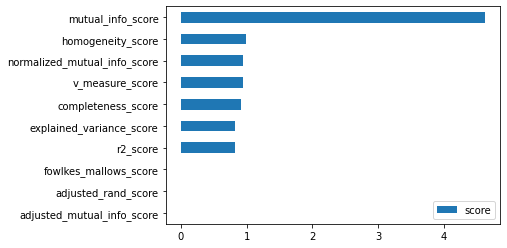

In [64]:
df_metriques.sort_values(by=colonne_de_score).plot(kind="barh")

# on s'intéresse en général au r2 et à la variance expliquée